<a href="https://colab.research.google.com/github/yecidmateus/AI/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pylab import rand,plot,show,norm

class Perceptron:
 def __init__(self):
  """ perceptron initialization """
  self.w = rand(2)*2-1 # weights
  self.learningRate = 0.1

 def response(self,x):
  """ perceptron output """
  y = x[0]*self.w[0]+x[1]*self.w[1] # dot product between w and x
  if y >= 0:
   return 1
  else:
   return -1

 def updateWeights(self,x,iterError):
  """
   updates the weights status, w at time t+1 is
       w(t+1) = w(t) + learningRate*(d-r)*x
   where d is desired output and r the perceptron response
   iterError is (d-r)
  """
  self.w[0] += self.learningRate*iterError*x[0]
  self.w[1] += self.learningRate*iterError*x[1]

 def train(self,data):
  """ 
   trains all the vector in data.
   Every vector in data must have three elements,
   the third element (x[2]) must be the label (desired output)
  """
  learned = False
  iteration = 0
  while not learned:
   globalError = 0.0
   for x in data: # for each sample
    r = self.response(x)    
    if x[2] != r: # if we have a wrong response
     iterError = x[2] - r # desired response - actual response
     self.updateWeights(x,iterError)
     globalError += abs(iterError)
   iteration += 1
   if globalError == 0.0 or iteration >= 100: # stop criteria
    print ('iterations',iteration)
    learned = True # stop learning

#Inicializamos el Perceptrón
Definimos los pesos del perceptrón de manera aleatoria con la función random y la tasa de entrenamiento con la función learning rate.

#Definimos la salida deseada del perceptrón
#y = g(a) = g (∑ wi*xi + w0)  ==> g (wi *xi)

#Definimos el entrenamiento o aprendizaje de la red 

Para que la red alcance el valor adecuado para los pesos, es necesario someterla a un
entrenamiento o aprendizaje. Una de las primeras reglas de aprendizaje fue propuesta
por D. Hebb en 1949 [Hebb, 1949], y se basa en un hecho biológico constatado: cuando
dos neuronas se activan simultáneamente su conexión se refuerza. Esto es, cuando una
neurona tiene un nivel positivo de actividad y se siente estimulada por otra neurona,
tiende a producirse un refuerzo en la conexión que las enlaza. Por el contrario, si una
neurona tiende a inhibir a otra, la fuerza de conexión entre ambas también tiende a
disminuir. Suponiendo que en el modelo de la Figura 15.1, la entrada xi es la salida
de otra neurona, el peso wi será incrementado cuando xi e y sean positivos, pero
también lo hará cuando ambos parámetros sean negativos. En contraposición, dicho
peso se decrementará cuando xi e y tengan signos contrarios. Esta idea se expresa
matemáticamente como:
wi(τ + 1) = wi(τ) + ηxiy, (15.12)
esto es, un peso wi en un determinado instante del entrenamiento τ + 1, es igual
al peso en el instante anterior más un incremento o decremento. La magnitud de
dicho cambio viene determinada tanto por la entrada xi y la salida y de la neurona
como por η conocida como ratio o tasa de aprendizaje. Esta es una constante positiva
que determina en qué proporción se modifica el peso sináptico (cuanto mayor es la
modificación) y, en cierto modo, controla la velocidad del proceso de aprendizaje. Se
puede observar que esta regla de aprendizaje es no supervisada, ya que se emplea la
salida de la neurona, y, pero no la salida deseada, t.

#Definimos el entrenamiento de la red
trains all the vector in data.

Every vector in data must have three elements,
   the third element (x[2]) must be the label (desired output)
  """

In [0]:
#Perceptrons can only classify data when the two classes can be divided by a straight line (or, more generally, a hyperplane 
#if there are more than two inputs). This is called linear separation. Here is a function that generates a linearly separablen random dataset.

def generateData(n):
# generates a 2D linearly separable dataset with n samples. The third element of the sample is the label """
 xb = (rand(n)*2-1)/2-0.5
 yb = (rand(n)*2-1)/2+0.5
 xr = (rand(n)*2-1)/2+0.5
 yr = (rand(n)*2-1)/2-0.5
 inputs = []
 for i in range(len(xb)):
  inputs.append([xb[i],yb[i],1])
  inputs.append([xr[i],yr[i],-1])
 return inputs

iterations 2


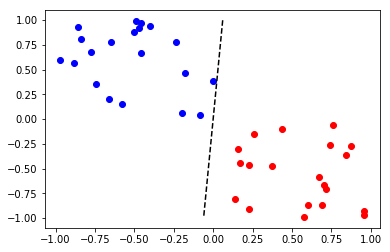

In [3]:
#And now we can use the Perceptron. We generate two dataset, the first one is used to train the classifier (train set), 
#and the second one is used to test it (test set):
trainset = generateData(30) # train set generation
perceptron = Perceptron()   # perceptron instance
perceptron.train(trainset)  # training
testset = generateData(20)  # test set generation

# Perceptron test
for x in testset:
 r = perceptron.response(x)
 if r != x[2]: # if the response is not correct
  print ('error')
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.w)
ww = perceptron.w/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()